In [13]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import numpy as np
from colicoords import Cell, load, CellPlot, iter_subplots, IterCellPlot, CellListPlot
from colicoords.support import pad_cell
from colicoords.config import cfg
import tifffile
import os
import seaborn as sns
sns.set_style('ticks')

import matplotlib

ff = matplotlib.rcParams['font.family']
print(ff)

matplotlib.rcParams.update({'font.size': 8})

['sans-serif']


In [7]:
data_dir = r'D:\figure_X_cc'

In [8]:
cy3b = load(os.path.join(data_dir, 'Cy3B_NHS', 'cells_final.hdf5'))
egfp = load(os.path.join(data_dir, 'eGFP', 'cells_final.hdf5'))
len(cy3b), len(egfp)

(2341, 1691)

In [9]:
cy3b_cell = cy3b[522]
egfp_cell = egfp[30]

shapes = np.array([c.data.shape for c in [cy3b_cell, egfp_cell]])
shapes_max = shapes.T.max(axis=1)
cy3b_pad = pad_cell(cy3b_cell, shapes_max)
egfp_pad = pad_cell(egfp_cell, shapes_max)

In [10]:
cy3b_aligned = tifffile.imread(os.path.join(data_dir, 'Cy3B_aligned.tif'))
egfp_aligned = tifffile.imread(os.path.join(data_dir, 'eGFP_aligned.tif'))

<IPython.core.display.Javascript object>


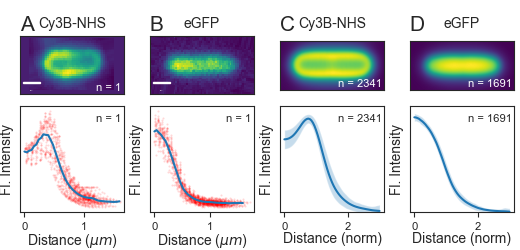

In [70]:
fig_height = 8.53534 / 2.54 *(5.2/4.8)
fig_width = 5.2 # Plos one text width (inches)
fig, axes = plt.subplots(2, 4, figsize=(fig_width, 2.5))
labelsize = 10

for ax in axes[0, :].flatten():
    ax.tick_params(axis='x', labelbottom=False)
    ax.tick_params(axis='y', labelleft=False)
    ax.set_xticks([])
    ax.set_yticks([])

    
for ax in axes[1, :].flatten():
    ax.tick_params(axis='y', labelleft=False)
    ax.set_yticks([])

sb = ScaleBar(80/1000, 'um', location='lower left', frameon=False, color='w', font_properties={'size': 0})

cp_cy3b_pad = CellPlot(cy3b_pad)
cp_cy3b_pad.imshow('fluorescence', ax=axes[0, 0])
sb = ScaleBar(80/1000, 'um', location='lower left', frameon=False, color='w', font_properties={'size': 0},
             label_formatter=lambda x, y: None, height_fraction=0.02)
axes[0, 0].add_artist(sb)
axes[0, 0].set_title('Cy3B-NHS', fontsize=labelsize)
axes[0, 0].text(0.975, 0.05, 'n = {}'.format(1), transform=axes[0, 0].transAxes, horizontalalignment='right',
               color='w')

cp_egfp_pad = CellPlot(egfp_pad)
cp_egfp_pad.imshow('fluorescence', ax=axes[0, 1])
sb = ScaleBar(80/1000, 'um', location='lower left', frameon=False, color='w', font_properties={'size': 0}, 
              label_formatter=lambda x, y: None, height_fraction=0.02)
axes[0, 1].add_artist(sb)
axes[0, 1].set_title('eGFP', fontsize=labelsize)
axes[0, 1].text(0.975, 0.05, 'n = {}'.format(1), transform=axes[1, 0].transAxes, horizontalalignment='right',
               color='w')


cp_cy3b = CellPlot(cy3b_cell)
cp_cy3b.plot_r_dist(ax=axes[1, 0])
axes[1, 0].plot(cy3b_cell.coords.rc.flatten() * cfg.IMG_PIXELSIZE / 1000, cy3b_cell.data.data_dict['fluorescence'].flatten(),
               'r.', alpha=0.15, markersize=1, zorder=-1)
axes[1, 0].xaxis.labelpad = 0
axes[1, 0].xaxis.label.set_size(labelsize)
axes[1, 0].set_ylabel('Fl. Intensity', fontsize=labelsize)
axes[1, 0].text(0.975, 0.85, 'n = {}'.format(1), transform=axes[1, 0].transAxes, horizontalalignment='right')


cp_egfp = CellPlot(egfp_cell)
cp_egfp.plot_r_dist(ax=axes[1, 1])
axes[1, 1].plot(egfp_cell.coords.rc.flatten() * cfg.IMG_PIXELSIZE / 1000, egfp_cell.data.data_dict['fluorescence'].flatten(),
               'r.', alpha=0.15, markersize=1, zorder=-1)
axes[1, 1].xaxis.labelpad = 0
axes[1, 1].xaxis.label.set_size(labelsize)
axes[1, 1].set_ylabel('Fl. Intensity', fontsize=labelsize)
axes[1, 1].text(0.975, 0.85, 'n = {}'.format(1), transform=axes[1, 1].transAxes, horizontalalignment='right')


axes[0, 2].imshow(cy3b_aligned, cmap='viridis', interpolation='spline16')
axes[0, 2].text(0.975, 0.05, 'n = {}'.format(len(cy3b)), transform=axes[0, 2].transAxes, horizontalalignment='right',
               color='w')
axes[0, 2].set_title('Cy3B-NHS', fontsize=labelsize, y=1.1)


axes[0, 3].imshow(egfp_aligned, cmap='viridis', interpolation='spline16')
axes[0, 3].text(0.975, 0.05, 'n = {}'.format(len(egfp)), transform=axes[0, 3].transAxes, horizontalalignment='right',
               color='w')
axes[0, 3].set_title('eGFP', fontsize=labelsize, y=1.1)


clp_cy3b = CellListPlot(cy3b)
clp_cy3b.plot_r_dist(ax=axes[1, 2], norm_x=True, norm_y=True, stop=3, zero=True)
axes[1, 2].xaxis.labelpad = 0
axes[1, 2].xaxis.label.set_size(labelsize)
axes[1, 2].set_ylabel('Fl. Intensity', fontsize=labelsize)
axes[1, 2].set_title('')
axes[1, 2].text(0.975, 0.85, 'n = {}'.format(len(cy3b)), transform=axes[1, 2].transAxes, horizontalalignment='right')


clp_egfp = CellListPlot(egfp)
clp_egfp.plot_r_dist(ax=axes[1, 3], norm_x=True, norm_y=True, stop=3, zero=True)
axes[1, 3].xaxis.labelpad = 0
axes[1, 3].xaxis.label.set_size(labelsize)
axes[1, 3].set_ylabel('Fl. Intensity', fontsize=labelsize)
axes[1, 3].set_title('')
axes[1, 3].text(0.975, 0.85, 'n = {}'.format(len(egfp)), transform=axes[1, 3].transAxes, horizontalalignment='right')

plt.tight_layout(pad=0.01)
plt.subplots_adjust(top=0.95)

p0 = axes[0, 0].get_position()
fig.text(p0.x0, 0.875, 'A', fontsize=15)

p0 = axes[0, 1].get_position()
fig.text(p0.x0, 0.875, 'B', fontsize=15)

p0 = axes[0, 2].get_position()
fig.text(p0.x0, 0.875, 'C', fontsize=15)

p0 = axes[0, 3].get_position()
fig.text(p0.x0, 0.875, 'D', fontsize=15)

plt.savefig('Figure_6.pdf', dpi=600)

In [69]:
t1 = axes[0, 1].set_title('test')
t1.set_position((0.5, 1.0))

In [64]:
t2 = axes[0, 2].set_title('test')
t2.get_position()

(0.5, 1.0)

In [67]:
t2.set_position((0.5, 1.1))

In [60]:
tt = axes[0, 3].set_title('test')
tt.get_position()

(0.5, 1.0)

In [66]:
tt.set_position((0.5, 1.1))

TypeError: set_position() got an unexpected keyword argument 'transform'

In [59]:
tt._transform[0]((3, 4))

TypeError: 'CompositeGenericTransform' object does not support indexing

In [49]:
tt.__dict__

{'_stale': False,
 'stale_callback': <function matplotlib.artist._stale_axes_callback(self, val)>,
 '_axes': <matplotlib.axes._subplots.AxesSubplot at 0x2144732ffd0>,
 'figure': <matplotlib.figure.Figure at 0x21448842898>,
 '_transform': CompositeGenericTransform(BboxTransformTo(TransformedBbox(Bbox([[0.7876602564102563, 0.6408967070459327], [0.9889533398364919, 0.8362851933583321]]), BboxTransformTo(TransformedBbox(Bbox([[0.0, 0.0], [5.2, 2.5]]), Affine2D(array([[100.,   0.,   0.],
        [  0., 100.,   0.],
        [  0.,   0.,   1.]])))))), ScaledTranslation((0.0, 0.08333333333333333))),
 '_transformSet': True,
 '_visible': True,
 '_animated': False,
 '_alpha': None,
 'clipbox': None,
 '_clippath': None,
 '_clipon': True,
 '_label': '',
 '_picker': None,
 '_contains': None,
 '_rasterized': None,
 '_agg_filter': None,
 '_mouseover': False,
 'eventson': False,
 '_oid': 0,
 '_propobservers': {},
 '_remove_method': None,
 '_url': None,
 '_gid': None,
 '_snap': None,
 '_sketch': None,
 

In [45]:
fig.text(p0.x0-0.42, 0.875, 'D', fontsize=15, verticalalignment='bottom')

In [33]:
p0 = axes[0, 3].get_position()
p0.y0

0.6408967070459327

In [29]:
p0

Bbox([[0.7876602564102563, 0.6408967070459327], [0.9889533398364919, 0.8362851933583321]])

In [28]:
matplotlib.rcParams['axes.titlepad']

6.0